<a href="https://colab.research.google.com/github/suafle/Clase2/blob/master/blackbody.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Erik's MATLAB code to perform a blackbody
#Input: wavelength (Å), blackbody Teff, blackbody Bolometric luminosity
#Output: Absolute AB magnitude at input wavelength
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.integrate import quad
from scipy.interpolate import interp1d
from astropy.utils.data import download_file

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


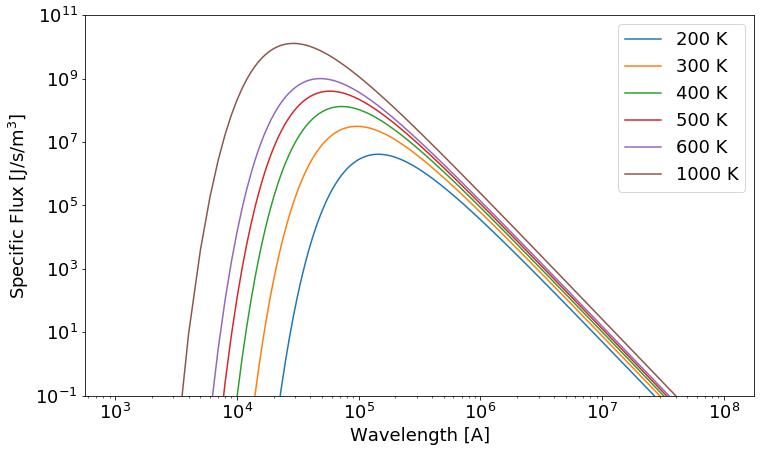

In [2]:
#Blackbody plot
def bb(wavelength,Teff):
  c = 2.99792e8 #m s^-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  return (2.*np.pi*h*c**2)/((wavelength*1e-10)**5)*(1./(np.exp(h*c/(wavelength*1e-10*k*Teff))-1)) # J s^-1 m^-2 m^-1

def rj(wavelength,Teff):
  c = 2.99792e8 #m s^-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  return 2.*np.pi*c*k*Teff/(wavelength*1e-10)**4

wave = np.arange(1e3,1e8,1000) 

#plt.plot(wave,rj(wave,300),c='blue')
#plt.plot(wave,rj(wave,600),c='orange')

plt.figure(figsize=(12,7))
matplotlib.rcParams.update({'font.size': 18})

plt.plot(wave,bb(wave,200),label='200 K')
plt.plot(wave,bb(wave,300),label='300 K')
plt.plot(wave,bb(wave,400),label='400 K')
plt.plot(wave,bb(wave,500),label='500 K')
plt.plot(wave,bb(wave,600),label='600 K')
plt.plot(wave,bb(wave,1000),label='1000 K')

#plt.axvline(5000,lw=0.5,c='g') #BP
#plt.axvline(6500,lw=0.5,c='g') #G
#plt.axvline(8000,lw=0.5,c='g') #RP

#plt.axvline(12350,lw=0.5,c='k') #J
#plt.axvline(16620,lw=0.5,c='k') #H
#plt.axvline(21590,lw=0.5,c='k') #Ks

#plt.axvline(33680,lw=0.5,c='b') #w1
#plt.axvline(46180,lw=0.5,c='b') #w2
#plt.axvline(120820,lw=0.5,c='b') #w3
#plt.axvline(221940,lw=0.5,c='b') #w4

plt.legend()

plt.ylim([1e-1,1e11])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Wavelength [A]')
plt.ylabel(r'Specific Flux [J/s/m$^{3}$]')
plt.show()
plt.close()

#To the naked eye, the integration is between 3e3 and 3e7 A

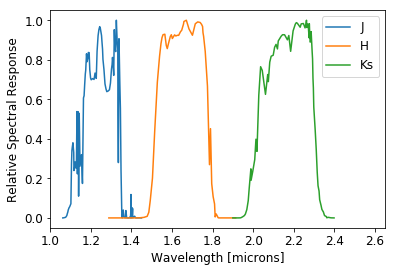

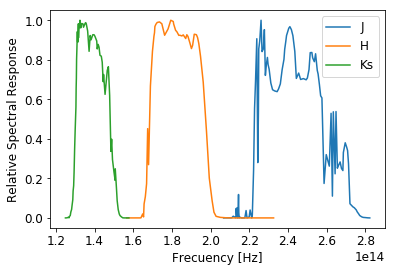

In [3]:
#2MASS passbands
mass_j = 'https://raw.githubusercontent.com/suafle/useful_data/master/2MASS_J.txt'
mass_h = 'https://raw.githubusercontent.com/suafle/useful_data/master/2MASS_H.txt'
mass_ks = 'https://raw.githubusercontent.com/suafle/useful_data/master/2MASS_Ks.txt'

tmass_j = np.loadtxt(mass_j)
tmass_h = np.loadtxt(mass_h)
tmass_ks = np.loadtxt(mass_ks)

c = 2.99792e8 #m s^-1
cm = c*1e6 #microns s**-1
cA = c*1e10 #A s**-1

def inter_j(wavelength): #wavelength must be in A in the range of 10620 and 14500 A
  f = interp1d(tmass_j[:,0]*1e4,tmass_j[:,1])
  return f(wavelength)
  
def inter_h(wavelength): #wavelength must be in A in the range of 12890 and 19140 A
  f = interp1d(tmass_h[:,0]*1e4,tmass_h[:,1])
  return f(wavelength)
  
def inter_ks(wavelength): #wavelength must be in A in the range of 19000 and 23990 A
  f = interp1d(tmass_ks[:,0]*1e4,tmass_ks[:,1])
  return f(wavelength)


def inter_ab_j(wavelength): #wavelength must be in A in the range of cA/10620 and cA/14500 A
  f = interp1d(np.flip(cA/(tmass_j[:,0]*1e4)),np.flip(tmass_j[:,1]))
  return f(wavelength)
  
def inter_ab_h(wavelength): #wavelength must be in A in the range of 12890 and 19140 A
  f = interp1d(np.flip(cA/(tmass_h[:,0]*1e4)),np.flip(tmass_h[:,1]))
  return f(wavelength)
  
def inter_ab_ks(wavelength): #wavelength must be in A in the range of 19000 and 23990 A
  f = interp1d(np.flip(cA/(tmass_ks[:,0]*1e4)),np.flip(tmass_ks[:,1]))
  return f(wavelength)
  
  
matplotlib.rcParams.update({'font.size': 12})

plt.plot(tmass_j[:,0],tmass_j[:,1],label='J')
plt.plot(tmass_h[:,0],tmass_h[:,1],label='H')
plt.plot(tmass_ks[:,0],tmass_ks[:,1],label='Ks')
plt.xlim([1.0,2.65])
plt.xlabel('Wavelength [microns]')
plt.ylabel('Relative Spectral Response')
plt.legend(loc=1)
plt.show()
plt.close()

plt.plot(cm/tmass_j[:,0],tmass_j[:,1],label='J')
plt.plot(cm/tmass_h[:,0],tmass_h[:,1],label='H')
plt.plot(cm/tmass_ks[:,0],tmass_ks[:,1],label='Ks')
#plt.xlim([1.0,2.65])
plt.xlabel('Frecuency [Hz]')
plt.ylabel('Relative Spectral Response')
plt.legend(loc=1)
plt.show()
plt.close()

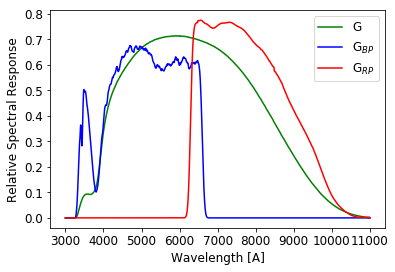

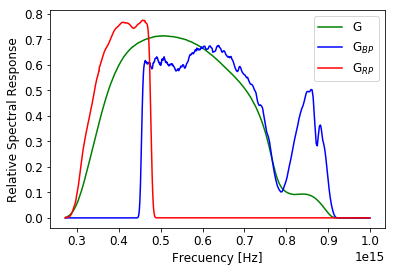

In [4]:
#GAIA passbands
#gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/GaiaDR2_Passbands.dat'
gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/GaiaDR2_RevisedPassbands.dat'
gaia = np.loadtxt(gaia_data)

gaia = np.where(gaia==99.99,0,gaia)

gaia_w = gaia[:,0]*10 #Angstrom
gaia_g = gaia[:,1]
gaia_bp = gaia[:,3]
gaia_rp = gaia[:,5]

def inter_g(wavelength): 
  f = interp1d(gaia_w,gaia_g)
  return f(wavelength)
  
def inter_gbp(wavelength): 
  f = interp1d(gaia_w,gaia_bp)
  return f(wavelength)
  
def inter_grp(wavelength): 
  f = interp1d(gaia_w,gaia_rp)
  return f(wavelength)


def inter_ab_g(wavelength):
  f = interp1d(np.flip(cA/(gaia_w)),np.flip(gaia_g))
  return f(wavelength)
  
def inter_ab_gbp(wavelength):
  f = interp1d(np.flip(cA/(gaia_w)),np.flip(gaia_bp))
  return f(wavelength)
  
def inter_ab_grp(wavelength): 
  f = interp1d(np.flip(cA/(gaia_w)),np.flip(gaia_rp))
  return f(wavelength)

matplotlib.rcParams.update({'font.size': 12})

plt.plot(gaia_w,gaia_g,label='G',color='green')
plt.plot(gaia_w,gaia_bp,label=r'G$_{BP}$',color='blue')
plt.plot(gaia_w,gaia_rp,label=r'G$_{RP}$',color='red')
plt.xlabel('Wavelength [A]')
plt.ylabel('Relative Spectral Response')
plt.legend(loc=1)
plt.show()
plt.close()

plt.plot(cA/gaia_w,gaia_g,label='G',color='green')
plt.plot(cA/gaia_w,gaia_bp,label=r'G$_{BP}$',color='blue')
plt.plot(cA/gaia_w,gaia_rp,label=r'G$_{RP}$',color='red')
plt.xlabel('Frecuency [Hz]')
plt.ylabel('Relative Spectral Response')
plt.legend(loc=1)
plt.show()
plt.close()

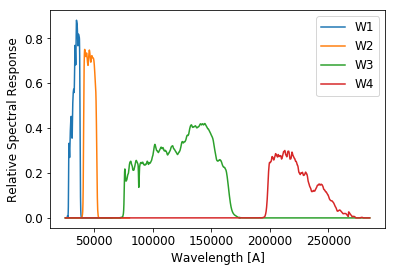

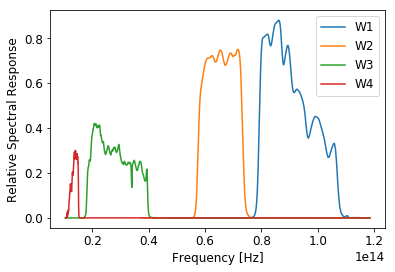

In [5]:
#WISE passbands
wise1_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/RSR-W1.txt'
wise2_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/RSR-W2.txt'
wise3_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/RSR-W3.txt'
wise4_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/RSR-W4.txt'

w1 = np.loadtxt(wise1_data)
w2 = np.loadtxt(wise2_data)
w3 = np.loadtxt(wise3_data)
w4 = np.loadtxt(wise4_data)

w1ww = w1[:,0]*1e4
w1r = w1[:,1]

w2ww = w2[:,0]*1e4
w2r = w2[:,1]

w3ww = w3[:,0]*1e4
w3r = w3[:,1]

w4ww = w4[:,0]*1e4
w4r = w4[:,1]

#wavelength must be between 25300 and 65000 A (W1)
#wavelength must be between 25300 and 80000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)


def inter_w1(wavelength): 
  f = interp1d(w1ww,w1r)
  return f(wavelength)
  
def inter_w2(wavelength): 
  f = interp1d(w2ww,w2r)
  return f(wavelength)

def inter_w3(wavelength): 
  f = interp1d(w3ww,w3r)
  return f(wavelength)

def inter_w4(wavelength): 
  f = interp1d(w4ww,w4r)
  return f(wavelength)

def inter_ab_w1(wavelength): 
  f = interp1d(np.flip(cA/(w1ww)),np.flip(w1r))
  return f(wavelength)

def inter_ab_w2(wavelength): 
  f = interp1d(np.flip(cA/(w2ww)),np.flip(w2r))
  return f(wavelength)

def inter_ab_w3(wavelength): 
  f = interp1d(np.flip(cA/(w3ww)),np.flip(w3r))
  return f(wavelength)

def inter_ab_w4(wavelength): 
  f = interp1d(np.flip(cA/(w4ww)),np.flip(w4r))
  return f(wavelength)
  

matplotlib.rcParams.update({'font.size': 12})

plt.plot(w1ww,w1r,label='W1')
plt.plot(w2ww,w2r,label='W2')
plt.plot(w3ww,w3r,label='W3')
plt.plot(w4ww,w4r,label='W4')
plt.xlabel('Wavelength [A]')
plt.ylabel('Relative Spectral Response')
plt.legend()
plt.show()
plt.close()

plt.plot(cA/w1ww,w1r,label='W1')
plt.plot(cA/w2ww,w2r,label='W2')
plt.plot(cA/w3ww,w3r,label='W3')
plt.plot(cA/w4ww,w4r,label='W4')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative Spectral Response')
plt.legend()
plt.show()
plt.close()

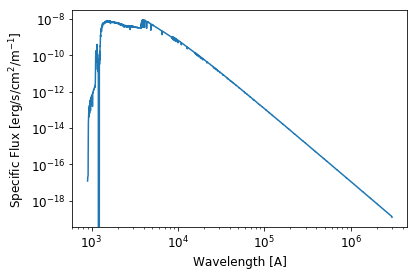

In [6]:
file = download_file('https://github.com/suafle/useful_data/blob/master/vega_spectrum.fits?raw=true',cache=True)
hdulist = fits.open(file)
#print(repr(hdulist[1].header))
vega_wavelength = hdulist[1].data.field('Wavelength') #Wavelength is in angstrom
vega_flux = hdulist[1].data.field('Flux') #Flux is in FLAM erg s**-1 cm**-2 A**-1
vega_flux2 = vega_flux/1e-10 #Flux in erg s**-1 cm**-2 m**-1
hdulist.close(vega_wavelength,vega_flux)
plt.plot(vega_wavelength,vega_flux)
plt.xlabel('Wavelength [A]')
plt.ylabel(r'Specific Flux [erg/s/cm$^2$/m$^{-1}$]')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.close()

def vega(wavelength):
  f = interp1d(vega_wavelength,vega_flux2)
  return f(wavelength)

In [0]:
#Lbol is in solar luminosities
#Teff is in K
#d is in pc
def mag_vega(Teff,Lbol): #ap mag in vega system for J,H,Ks system. Lbol is radius, and d is the distance to the source in pc
  Mpc = 3.0856e22 #m
  c = 2.99792e8 #m s^-1
  cA = c*1e10 #A s**-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  pc = 3.0857e16 #m
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  delta_wave = 1000 #Å
  wave_vector = np.arange(3000,3e7,delta_wave) #Check the graph above
  d = 10 #to calculated the absolute magnitude
  
  #Generate black body spectrum in f_lambda units
  #-----------------------------------------
  #F = pi*B #At the radius of the source
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave_vector*1e-10)**5)*(1./(np.exp(h*c/(wave_vector*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  flambda_BB_cgs = flambda_BB_SI*1e7/1e4 # erg s^-1 cm^-2 m^-1 (Flux at the surface)
  R = np.sqrt(Lbol*Lsun/(4.*np.pi*sigma_SB*Teff**4))# m Source radius (considering we know Lbol and Teff)
  
  flux = flambda_BB_cgs*(R/(d*pc))**2. #R is in m and d is in pc
  f = interp1d(wave_vector,flux) #BB function from interpolation
  #vega_d = 7.68*pc
  
  #################
  #GAIA magnitudes#
  #################
  ww = np.arange(3000,11000,0.1)
  FR_int = np.trapz(f(ww)*inter_g(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_g(ww),ww)
  g = -2.5*np.log10(FR_int/FR_vega)
  
  FR_int = np.trapz(f(ww)*inter_gbp(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_gbp(ww),ww)
  gbp = -2.5*np.log10(FR_int/FR_vega)
  
  FR_int = np.trapz(f(ww)*inter_grp(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_grp(ww),ww)
  grp = -2.5*np.log10(FR_int/FR_vega)
  
  ################
  #WISE magnitude#
  ################
  
  ww = np.arange(25300,65000,0.1)
  FR_int = np.trapz(f(ww)*inter_w1(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_w1(ww),ww)
  w1 = -2.5*np.log10(FR_int/FR_vega)
  
  ww = np.arange(25300,80000,0.1)
  FR_int = np.trapz(f(ww)*inter_w2(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_w2(ww),ww)
  w2 = -2.5*np.log10(FR_int/FR_vega)
  
  ww = np.arange(25300,285000,0.1)
  FR_int = np.trapz(f(ww)*inter_w3(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_w3(ww),ww)
  w3 = -2.5*np.log10(FR_int/FR_vega)
  
  ww = np.arange(25300,285000,0.1)
  FR_int = np.trapz(f(ww)*inter_w4(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_w4(ww),ww)
  w4 = -2.5*np.log10(FR_int/FR_vega)
  
  
  #################
  #2MASS magnitude#
  #################
  #Zero point Cohen et al. (2003)
  ww = np.arange(10620,14500,0.1) #trapezoid integral
  FR_int = np.trapz(f(ww)*inter_j(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_j(ww),ww)
  j = -2.5*np.log10(FR_int/FR_vega)
  
  ww = np.arange(12890,19140,0.1) #trapezoid integral
  FR_int = np.trapz(f(ww)*inter_h(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_h(ww),ww)
  h = -2.5*np.log10(FR_int/FR_vega)
  
  ww = np.arange(19000,23990,0.1) #trapezoid integral
  FR_int = np.trapz(f(ww)*inter_ks(ww),ww)
  FR_vega = np.trapz(vega(ww)*inter_ks(ww),ww)
  ks = -2.5*np.log10(FR_int/FR_vega)
  
  return j,h,ks,g,gbp,grp,w1,w2,w3,w4

def mag_ab(Teff,Lbol): 
  Mpc = 3.0856e22 #m
  c = 2.99792e8 #m s^-1
  cA = c*1e10 #A s**-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  pc = 3.0857e16 #m
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  delta_wave = 1000 #Å
  wave_vector = np.arange(3000,3e7,delta_wave) #Check the graph above (also in A)
  wave_nu = cA/wave_vector #Hz
  d = 10 #pc, to account for absolute magnitudes
  
  #Generate black body spectrum in f_lambda units
  #-----------------------------------------
  #F = pi*B #At the radius of the source
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave_vector*1e-10)**5)*(1./(np.exp(h*c/(wave_vector*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  flambda_BB_cgs = flambda_BB_SI*1e7/1e4 # erg s^-1 cm^-2 m^-1 (Flux at the surface)
  R = np.sqrt(Lbol*Lsun/(4.*np.pi*sigma_SB*Teff**4))# m Source radius (considering we know Lbol and Teff)
  
  flux = flambda_BB_cgs*(R/(d*pc))**2. # erg s**-1 cm**-2 m**-1, R is in m and d is in pc
  flux = (flambda_BB_cgs*(R/(d*pc))**2.)/(1e10) # erg s**-1 cm**-2 A**-1, R is in m and d is in pc
  flux_nu = (flux*(wave_vector)**2)/(c*1e10) # erg s**-1 cm**-2 Hz**-1, the last 1e10 is to change c from m/s to A/s
  #vega_d = 7.68*pc
  
  #AB magnitude
  f = interp1d(wave_nu,flux_nu) #BB function from interpolation
  
  #################
  #2MASS magnitude#
  #################
  
  nu = np.arange(cA/14500,cA/10620,1e9) #trapezoid integral
  FR_int = np.trapz(f(nu)*inter_ab_j(nu),nu)
  R_int = np.trapz(inter_ab_j(nu),nu)
  j = -2.5*np.log10(FR_int/R_int) - 48.6
  
  nu = np.arange(cA/19140,cA/12890,1e9) #trapezoid integral
  FR_int = np.trapz(f(nu)*inter_ab_h(nu),nu)
  R_int = np.trapz(inter_ab_h(nu),nu)
  h = -2.5*np.log10(FR_int/R_int) - 48.6
  
  nu = np.arange(cA/23990,cA/19000,1e9) #trapezoid integral
  FR_int = np.trapz(f(nu)*inter_ab_ks(nu),nu)
  R_int = np.trapz(inter_ab_ks(nu),nu)
  ks = -2.5*np.log10(FR_int/R_int) - 48.6
  
  ################
  #GAIA magnitude#
  ################
  
  nu = np.arange(cA/11000.,cA/3000.,1e9) #trapezoid integral
  FR_int = np.trapz(f(nu)*inter_ab_g(nu),nu)
  R_int = np.trapz(inter_ab_g(nu),nu)
  g = -2.5*np.log10(FR_int/R_int) - 48.6
  
  FR_int = np.trapz(f(nu)*inter_ab_gbp(nu),nu)
  R_int = np.trapz(inter_ab_gbp(nu),nu)
  gbp = -2.5*np.log10(FR_int/R_int) - 48.6
  
  FR_int = np.trapz(f(nu)*inter_ab_grp(nu),nu)
  R_int = np.trapz(inter_ab_grp(nu),nu)
  grp = -2.5*np.log10(FR_int/R_int) - 48.6
  
  J = j - 5*np.log10(d/10.)
  H = h - 5*np.log10(d/10.)
  Ks = ks - 5*np.log10(d/10.)
  
  ################
  #WISE magnitude#
  ################
  
  
  #wavelength must be between 25300 and 65000 A (W1)
  #wavelength must be between 25300 and 80000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  
  nu = np.arange(cA/65000.,cA/25300.,1e9) #trapezoid integral
  FR_int = np.trapz(f(nu)*inter_ab_w1(nu),nu)
  R_int = np.trapz(inter_ab_w1(nu),nu)
  w1 = -2.5*np.log10(FR_int/R_int) - 48.6
  
  nu = np.arange(cA/80000.,cA/25300.,1e9) #trapezoid integral
  FR_int = np.trapz(f(nu)*inter_ab_w2(nu),nu)
  R_int = np.trapz(inter_ab_w2(nu),nu)
  w2 = -2.5*np.log10(FR_int/R_int) - 48.6
  
  nu = np.arange(cA/285000.,cA/25300.,1e9) #trapezoid integral
  FR_int = np.trapz(f(nu)*inter_ab_w3(nu),nu)
  R_int = np.trapz(inter_ab_w3(nu),nu)
  w3 = -2.5*np.log10(FR_int/R_int) - 48.6
  
  nu = np.arange(cA/285000.,cA/25300.,1e9) #trapezoid integral
  FR_int = np.trapz(f(nu)*inter_ab_w4(nu),nu)
  R_int = np.trapz(inter_ab_w4(nu),nu)
  w4 = -2.5*np.log10(FR_int/R_int) - 48.6
  
  
  return j,h,ks,g,gbp,grp,w1,w2,w3,w3

In [8]:
#Example, Kepler 452
#J 12.263 2MASS
#H 11.919 2MASS
#K 11,852 2MASS
#G 13.4048 Gaia
#Teff 5757
#Luminosity 1.2 Solar
#Distance 561 pc
#Radius 1.1 Solar

print mag_vega(5757,1.2)
print mag_ab(5757,1.2)

(3.5166414252045652, 3.3120397635310184, 3.1943058944404563, 4.61162548577764, 4.904527672079604, 3.984690196792397, 3.0550282536012996, 2.982238664837187, 2.883927742636625, 2.831588217781946)
(4.411669672246319, 4.680425364744622, 5.0314538339335755, 4.68626291581883, 4.95720769082147, 4.344597597232422, 5.707890171020637, 6.278254352999717, 7.92447469125802, 7.92447469125802)
